In [13]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_swaped_row(index, data)


SyntaxError: invalid syntax (<ipython-input-13-d960544c3de0>, line 1)

# <span style='color:green'> **[done]** </span>Loading pre-processed data

In [4]:
loc = '../data/'
file = 'data_pre_processed.csv'
df = pd.read_csv(loc+file)
df.tail(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str_acc,f_sapm,f_str_def,f_td_avg,f_td_acc,f_td_def,f_sub_avg,f_last_match,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str_acc,o_sapm,o_str_def,o_td_avg,o_td_acc,o_td_def,o_sub_avg,o_last_match
6308,win,Remco Pardoel,Alberta Cerra Leon,0,0,4,1,1,0,1,0,Open Weight,SUB,Ezekiel Choke,1,9:51,1994-03-11,0.0,0.0,0,0,1,1,9,6,1 (2 NC),190.50,117.0,195.31,Southpaw,37.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09-08-1995,0,1,0,172.72,107.10,177.08,Orthodox,37.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994
6309,win,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,Open Weight,KO/TKO,Other,1,2:50,1994-03-11,0.0,0.0,0,0,1,1,1,5,0,177.80,76.5,182.29,Southpaw,37.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994,0,1,0,187.96,110.25,192.70,Orthodox,37.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994
6310,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,Open Weight,KO/TKO,Punches,1,12:13,1994-03-11,0.0,0.0,0,0,1,1,2,1,0,182.88,94.5,187.50,Orthodox,37.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994,1,3,0,195.58,123.75,200.52,Orthodox,37.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994


# <span style='color:green'> **[done]** </span>Feature Y
1. get randome rows & swap stats between fighters  
2. change result to "lose"
** this way first fighter will not always be the winner

### <span style='color:green'> **[done]** </span> Function setup:

In [18]:
original_size = len(df)

for i in tqdm(range(0,original_size)): 
    if random.random() > 0.5:
        df.loc[i] = get_swaped_row(index=i, data=df)

print(df.result.unique())     

100%|██████████| 6311/6311 [00:25<00:00, 246.53it/s]

['win' 'lose']


## Column's Legend:
****
* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)
* <span style='color:blue'> **TD Avg.** </span> - Average Takedowns Landed per 15 minutes
* <span style='color:blue'> **TD Acc.** </span> - Takedown Accuracy
* <span style='color:blue'> **TD Def.** </span> - Takedown Defense (the % of opponents TD attempts that did not land)
* <span style='color:blue'> **Sub. Avg.** </span> - Average Submissions Attempted per 15 minutes

In [ ]:
>>>>>>>>>>>>>>>>>

# <span style='color:green'> **[done]** </span> Feature Engineering = past fight's statistics:

In [6]:
for column in ['kd','str','td','sub']:
    df[column + '_dif'] = df['f_' + column] - df['o_' + column]
    df = df.drop(columns=['f_' + column, 'o_' + column])
    
df.head(1)

,result,weight class,method,round,time,date,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,kd_dif,str_dif,td_dif,sub_dif
0,win,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,0.88,0.73,0,5,1,0,14.383,11,1.0,0,193.04,110.25,205.74,Orthodox,33.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15,4.0,0,187.96,118.8,190.5,Southpaw,30.0,4.12,0.5,4.24,0.45,0.0,0.0,0.52,0.0,0,81,0,0


<AxesSubplot:xlabel='result', ylabel='sub_dif'>

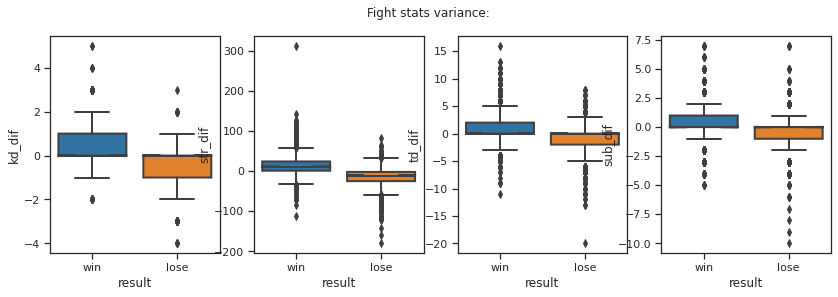

In [7]:
rows=1
cols=4
fig, axs = plt.subplots(rows,cols,figsize = (14,4))
fig.suptitle('Fight stats variance:')

sns.boxplot(ax=axs[0], x='result', y='kd_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='str_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[2], x='result', y='td_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[3], x='result', y='sub_dif', data=df,notch=True, showcaps=True)

fight stats contain significant varince > will be included as features

In [8]:
new_features = ['kd_dif','str_dif','td_dif','sub_dif']
for column in new_features:
    df[column] = (df[column] - np.mean(df[column]))/np.std(df[column])

df[new_features].head()    

,kd_dif,str_dif,td_dif,sub_dif
0,0.007043,3.063020,-0.006803,0.000126
1,0.007043,-1.529376,-0.401549,0.000126
2,0.007043,-0.174243,-0.796295,-1.694540
3,-1.347450,-0.738882,-0.006803,0.000126
4,0.007043,-0.437741,-1.191042,0.847459


In [9]:
features = []
new_features = ['kd_dif','str_dif','td_dif','sub_dif']

for feature in new_features:
    features.append(feature)
    df[feature] = df[feature]

print('+ Features:')    
print(features)    

+ Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = TakeDowns:
Exploring takedowns as feature using the following columns:
* <span style='color:blue'> **TD Avg.** </span> column
* <span style='color:blue'> **TD Acc.** </span> column
* <span style='color:blue'> **TD Def.** </span> column

In [10]:
tdf = (df[['result','fighter','opponent','f_td avg.','f_td acc.','f_td def.','o_td avg.','o_td acc.','o_td def.']]).copy()
tdf.head(3)

,result,fighter,opponent,f_td avg.,f_td acc.,f_td def.,o_td avg.,o_td acc.,o_td def.
0,win,Ciryl Gane,Tai Tuivasa,0.62,0.21,0.55,0.00,0.00,0.52
1,lose,Marvin Vettori,Robert Whittaker,1.89,0.44,0.74,0.82,0.37,0.84
2,lose,Joaquin Buckley,Nassourdine Imavov,1.35,0.30,0.66,0.95,0.23,0.76


In [11]:
columns = ['td avg.','td acc.','td def.']
for column in columns:
    tdf[column + '_dif'] = tdf['f_' + column] - tdf['o_' + column]
    tdf[column + '_dif'] = (tdf[column + '_dif'] - np.mean(tdf[column + '_dif']))/np.std(tdf[column + '_dif'])
    
tdf = tdf[['result','td avg._dif','td acc._dif','td def._dif']]   
tdf.head()

,result,td avg._dif,td acc._dif,td def._dif
0,win,0.341736,0.744283,0.100671
1,lose,0.592610,0.254682,-0.334902
2,lose,0.219086,0.254682,-0.334902
3,lose,0.603760,0.219711,-0.133868
4,lose,-1.676410,-2.088406,-2.010182


<AxesSubplot:xlabel='result', ylabel='td avg._dif'>

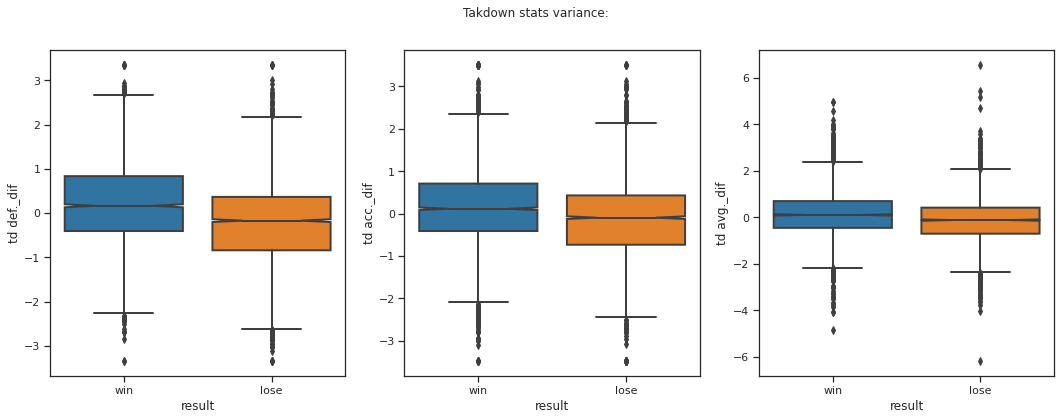

In [12]:
rows=1
cols=3
fig, axs = plt.subplots(rows,cols,figsize = (18,6))
fig.suptitle('Takdown stats variance:')

sns.boxplot(ax=axs[0], x='result', y='td def._dif', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='td acc._dif', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[2], x='result', y='td avg._dif', data=tdf,notch=True, showcaps=True)

takedowns statistics contain variance > will be included as features

In [13]:
new_features = tdf.columns[1:]

for feature in new_features:
    features.append(feature)
    df[feature] = tdf[feature]

print('Features:')    
print(features)    

Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Submissions:
Exploring submissions as feature using the following columns:
* <span style='color:blue'> **Sub. Avg.** </span> column = average submission attempts

In [14]:
columns = ['result','fighter', 'opponent','f_sub. avg.','o_sub. avg.']
sub_df = (df[columns]).copy()
sub_df.head(3)

,result,fighter,opponent,f_sub. avg.,o_sub. avg.
0,win,Ciryl Gane,Tai Tuivasa,0.5,0.0
1,lose,Marvin Vettori,Robert Whittaker,0.6,0.0
2,lose,Joaquin Buckley,Nassourdine Imavov,0.0,2.4


In [15]:
column = 'sub. avg.'
sub_df[column + '_dif'] = sub_df['f_' + column] - sub_df['o_' + column]
    
sub_df = sub_df[['result', column+'_dif']]   
sub_df.head()

,result,sub. avg._dif
0,win,0.5
1,lose,0.6
2,lose,-2.4
3,lose,0.0
4,lose,1.0


<AxesSubplot:xlabel='result', ylabel='sub. avg._dif'>

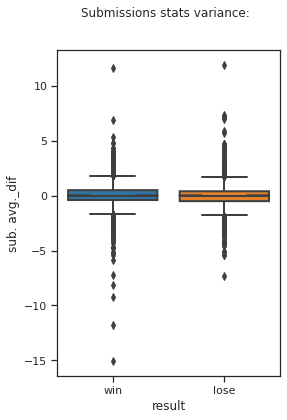

In [16]:
fig, axs = plt.subplots(figsize = (4,6))
fig.suptitle('Submissions stats variance:')
sns.boxplot( x='result', y='sub. avg._dif', data=sub_df, notch=True, showcaps=True)

it seems there is no impact of sub average on the fight outcome, 
i will check what is the case with fights that ended with submission:

In [17]:
mask = df['method'].str.contains('SUB:')
test_sub_df = (df.loc[mask, ['result','fighter','opponent','f_sub. avg.','o_sub. avg.']]).copy()
test_sub_df['sub. avg._dif'] = test_sub_df['f_sub. avg.'] - test_sub_df['o_sub. avg.']
test_sub_df.head()

,result,fighter,opponent,f_sub. avg.,o_sub. avg.,sub. avg._dif
11,lose,Ailin Perez,Stephanie Egger,0.0,0.8,-0.8
28,win,Frank Mir,Pete Williams,2.0,0.9,1.1
29,lose,Kelly Dullanty,Matt Serra,0.0,0.9,-0.9
32,win,Jacare Souza,Chris Camozzi,1.3,0.5,0.8
36,lose,Mike Rio,Francisco Trinaldo,1.0,0.5,0.5


<AxesSubplot:xlabel='result', ylabel='sub. avg._dif'>

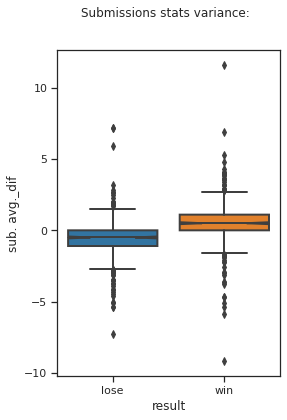

In [18]:
fig, axs = plt.subplots(figsize = (4,6))
fig.suptitle('Submissions stats variance:')
sns.boxplot( x='result', y='sub. avg._dif', data=test_sub_df, notch=True, showcaps=True)

after filtering only the fights that ended with submissions we see significant impact of "sub average", i will use it as a feature due to the fact that submission have big impact of how fighters fight(even though it might not end with sub)

In [19]:
column = 'sub. avg._dif'
sub_df[column] = (sub_df[column] - np.mean(sub_df[column]))/np.std(sub_df[column])
sub_df = sub_df[[column]] 

In [20]:
feature = 'sub. avg._dif'
features.append(feature)
df[feature] = sub_df[feature]
    
print(features)   

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Striking:

* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)

In [21]:
str_df = (df[['result','fighter','opponent','method','f_slpm','o_slpm','f_str. acc.','o_str. acc.','f_sapm','o_sapm','f_str. def','o_str. def','str_dif']]).copy()
str_df.head()

,result,fighter,opponent,method,f_slpm,o_slpm,f_str. acc.,o_str. acc.,f_sapm,o_sapm,f_str. def,o_str. def,str_dif
0,win,Ciryl Gane,Tai Tuivasa,KO/TKO:Punches,5.11,4.12,0.59,0.50,2.25,4.24,0.62,0.45,3.063020
1,lose,Marvin Vettori,Robert Whittaker,U-DEC:,4.20,4.48,0.44,0.42,3.58,3.26,0.59,0.61,-1.529376
2,lose,Joaquin Buckley,Nassourdine Imavov,U-DEC:,3.61,4.08,0.32,0.54,3.42,2.43,0.54,0.62,-0.174243
3,lose,Alessio Di Chirico,Roman Kopylov,KO/TKO:Punches,3.32,3.44,0.39,0.44,3.44,3.81,0.61,0.60,-0.738882
4,lose,Jarno Errens,William Gomis,U-DEC:,1.33,2.13,0.37,0.45,2.13,1.33,0.54,0.62,-0.437741


In [22]:
columns = ['slpm','str. acc.','sapm','str. def']
for column in columns:
    str_df[column + '_dif'] = str_df['f_' + column] - str_df['o_' + column]
    str_df[column + '_dif'] = (str_df[column + '_dif'] - np.mean(str_df[column + '_dif']))/np.std(str_df[column + '_dif'])
    
str_df = str_df[['result', columns[0] +'_dif',columns[1] +'_dif', columns[2] +'_dif', columns[3] +'_dif']]   
str_df.head()

,result,slpm_dif,str. acc._dif,sapm_dif,str. def_dif
0,win,0.641259,0.737225,-1.220265,1.444073
1,lose,-0.162187,0.169665,0.190005,-0.154053
2,lose,-0.282388,-1.776257,0.599045,-0.658725
3,lose,-0.060965,-0.397896,-0.231244,0.098283
4,lose,-0.491157,-0.641136,0.483048,-0.658725


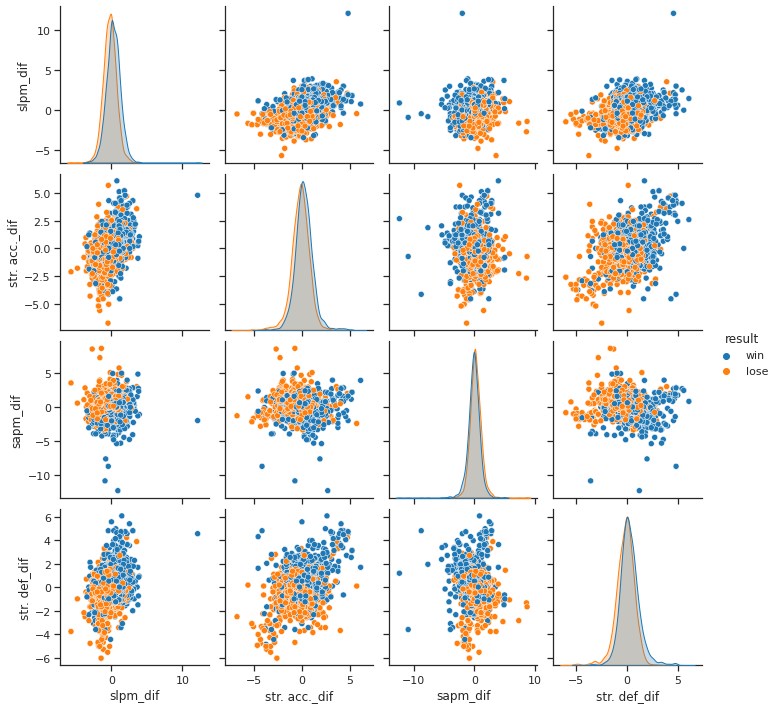

In [23]:
sns.pairplot(data=str_df, hue="result")

striking differences causing variance between fighters win & lose > will be included as features

In [24]:
new_features = str_df.columns[1:]

for feature in new_features:
    features.append(feature)
    df[feature] = str_df[feature]

print('Features:')    
print(features)  

Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Height:

In [25]:
hdf = (df[['result','fighter','opponent','method','weight class','f_height','o_height']]).copy()
hdf['height_df'] = hdf['f_height'] - hdf['o_height']
hdf['height_df'] = (hdf['height_df'] - np.mean(hdf['height_df']))/np.std(hdf['height_df'])
hdf.head(3)

,result,fighter,opponent,method,weight class,f_height,o_height,height_df
0,win,Ciryl Gane,Tai Tuivasa,KO/TKO:Punches,Heavyweight,193.04,187.96,0.785764
1,lose,Marvin Vettori,Robert Whittaker,U-DEC:,Middleweight,182.88,182.88,0.011083
2,lose,Joaquin Buckley,Nassourdine Imavov,U-DEC:,Middleweight,177.80,190.50,-1.925618


<AxesSubplot:xlabel='result', ylabel='height_df'>

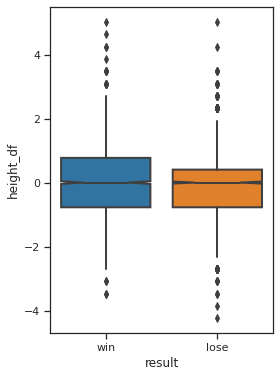

In [26]:
plt.figure(figsize = (4,6))
sns.boxplot(data=hdf, x='result', y='height_df',notch=True, showcaps=False)

height has no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = Reach:

In [27]:
rdf = (df[['result','fighter','opponent','method','weight class','f_reach','o_reach']]).copy()
rdf['reach_dif'] = rdf['f_reach'] - rdf['o_reach']
rdf['reach_dif'] = (rdf['reach_dif'] - np.mean(rdf['reach_dif']))/np.std(rdf['reach_dif'])
rdf.head(3)

,result,fighter,opponent,method,weight class,f_reach,o_reach,reach_dif
0,win,Ciryl Gane,Tai Tuivasa,KO/TKO:Punches,Heavyweight,205.74,190.50,1.856229
1,lose,Marvin Vettori,Robert Whittaker,U-DEC:,Middleweight,187.96,185.42,0.321729
2,lose,Joaquin Buckley,Nassourdine Imavov,U-DEC:,Middleweight,193.04,190.50,0.321729


<AxesSubplot:xlabel='result', ylabel='reach_dif'>

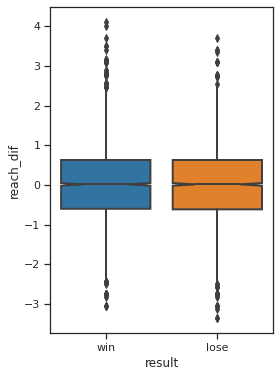

In [28]:
plt.figure(figsize = (4,6))
sns.boxplot(data=rdf, x='result', y='reach_dif',notch=True, showcaps=False)

no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = stance:

In [29]:
stance_df = (df[['result','fighter','opponent','f_stance','o_stance']]).copy()
stance_df['stance_combo'] = stance_df['f_stance'] + ':' + stance_df['o_stance']
stance_df.head(3)

,result,fighter,opponent,f_stance,o_stance,stance_combo
0,win,Ciryl Gane,Tai Tuivasa,Orthodox,Southpaw,Orthodox:Southpaw
1,lose,Marvin Vettori,Robert Whittaker,Southpaw,Orthodox,Southpaw:Orthodox
2,lose,Joaquin Buckley,Nassourdine Imavov,Southpaw,Orthodox,Southpaw:Orthodox


In [30]:
stance_df['stance_win_ratio'] = None

for combo,i in zip(stance_df['stance_combo'],range(0,len(df))):
    stance_df.loc[i, 'stance_win_ratio'] = get_wins_ratio(combo=combo,data=stance_df)
    
stance_df.head(3)    

,result,fighter,opponent,f_stance,o_stance,stance_combo,stance_win_ratio
0,win,Ciryl Gane,Tai Tuivasa,Orthodox,Southpaw,Orthodox:Southpaw,0.45679
1,lose,Marvin Vettori,Robert Whittaker,Southpaw,Orthodox,Southpaw:Orthodox,0.532928
2,lose,Joaquin Buckley,Nassourdine Imavov,Southpaw,Orthodox,Southpaw:Orthodox,0.532928


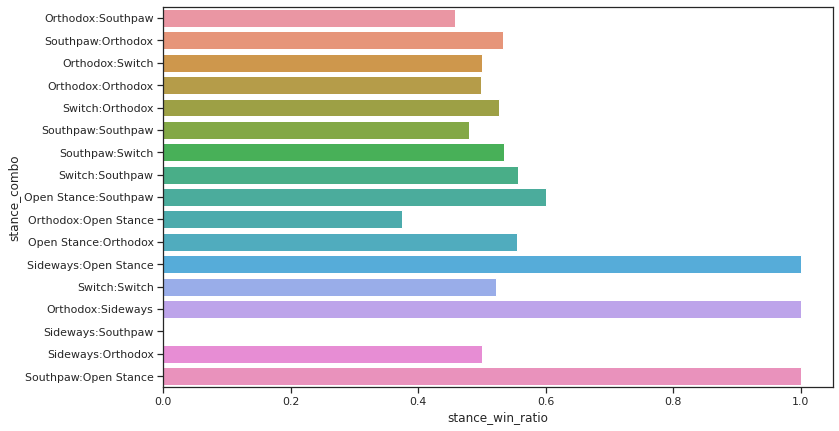

In [31]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")

* some stances gives significant edge ( >> 0.5) over its opponent stance,
* 1 or 0 stance_win_ratio is irrelevant (=only one time occured) so i will change it to 0.5 (=50:50 chance)

In [32]:
for i in range(0,len(stance_df)):
    
    if stance_df.loc[i,'stance_win_ratio'] == 1:
        stance_df.loc[i,'stance_win_ratio'] = 0.5
        
    if stance_df.loc[i,'stance_win_ratio'] == 0.0:
        stance_df.loc[i,'stance_win_ratio'] = 0.5 

# normalizing:
stance_df['stance_win_ratio'] = (stance_df['stance_win_ratio'] - np.mean(stance_df['stance_win_ratio']))/np.std(stance_df['stance_win_ratio'])        
stance_df.head(3)        

,result,fighter,opponent,f_stance,o_stance,stance_combo,stance_win_ratio
0,win,Ciryl Gane,Tai Tuivasa,Orthodox,Southpaw,Orthodox:Southpaw,-1.77606
1,lose,Marvin Vettori,Robert Whittaker,Southpaw,Orthodox,Southpaw:Orthodox,1.488122
2,lose,Joaquin Buckley,Nassourdine Imavov,Southpaw,Orthodox,Southpaw:Orthodox,1.488122


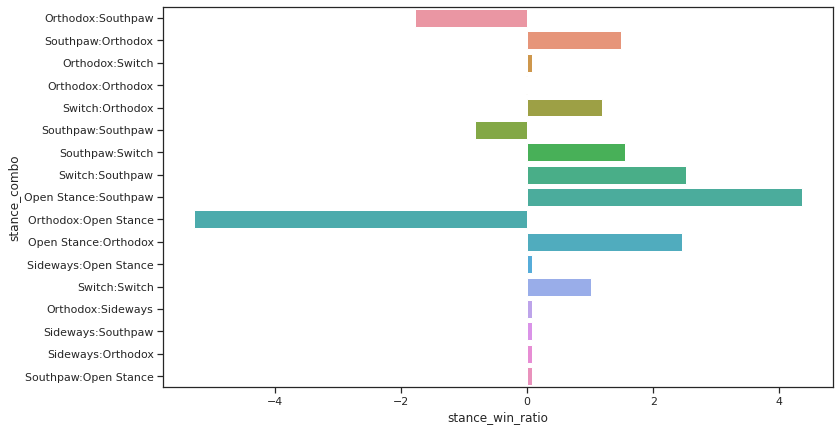

In [33]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")

In [34]:
features.append('stance_win_ratio')
df['stance_win_ratio'] = stance_df['stance_win_ratio']
print(features)

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif', 'stance_win_ratio']


# <span style='color:green'> **[done]** </span> Feature Engineering = Win/Lose streak:

In [35]:
win_df = (df[['result','fighter','opponent','f_win_perc','o_win_perc','f_win_strk','o_win_strk','f_lose_strk','o_lose_strk']]).copy()
win_df.head(3)

,result,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,win,Ciryl Gane,Tai Tuivasa,0.88,0.73,0,5,1,0
1,lose,Marvin Vettori,Robert Whittaker,0.73,0.78,1,0,0,1
2,lose,Joaquin Buckley,Nassourdine Imavov,0.71,0.75,3,2,0,0


In [36]:
columns = ['win_perc','win_strk','lose_strk']

for column in columns:
    win_df[column + '_dif'] = win_df['f_' + column] - win_df['o_' + column]
    win_df[column + '_dif'] = (win_df[column + '_dif'] - np.mean(win_df[column + '_dif']))/np.std(win_df[column + '_dif'])
    
win_df = win_df[['result', columns[0] +'_dif',columns[1] +'_dif', columns[2] +'_dif']]   
win_df.head()

,result,win_perc_dif,win_strk_dif,lose_strk_dif
0,win,0.378717,-2.870051,1.083053
1,lose,-0.132313,0.562079,-1.071529
2,lose,-0.106761,0.562079,0.005762
3,lose,1.017504,-0.009943,-1.071529
4,lose,-0.004555,-0.009943,0.005762


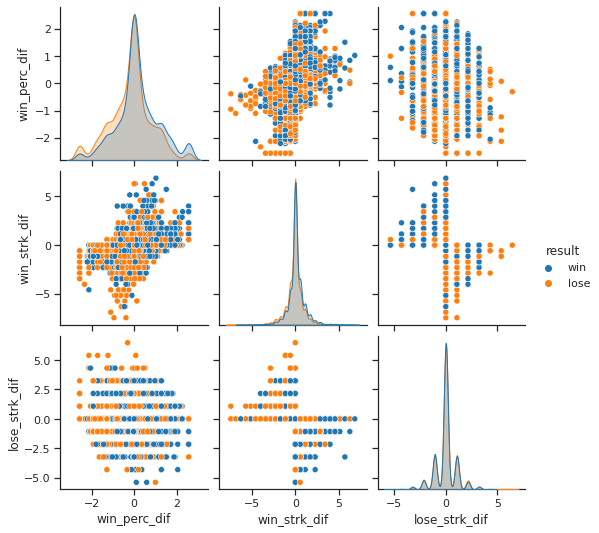

In [37]:
sns.pairplot(data=win_df, hue="result")

we can see very significant variance > might be the strongest predictor for fight's winner > will be included as features

In [38]:
new_features = win_df.columns[1:]
for feature in new_features:
    features.append(feature)
    df[feature] = win_df[feature]
    
print(features)    

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif']


# <span style='color:green'> **[done]** </span> saving Features data file:

In [39]:
columns = ['result','fighter','opponent','date','weight class','method',]
for feature in features:
    columns.append(feature)

final_df = df[columns]
final_df = final_df.dropna()
final_df.head(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,win,Ciryl Gane,Tai Tuivasa,2022-09-03,Heavyweight,KO/TKO:Punches,0.007043,3.063020,-0.006803,0.000126,0.341736,0.744283,0.100671,0.475716,0.641259,0.737225,-1.220265,1.444073,-1.77606,0.378717,-2.870051,1.083053
1,lose,Marvin Vettori,Robert Whittaker,2022-09-03,Middleweight,U-DEC:,0.007043,-1.529376,-0.401549,0.000126,0.592610,0.254682,-0.334902,0.571055,-0.162187,0.169665,0.190005,-0.154053,1.488122,-0.132313,0.562079,-1.071529
2,lose,Joaquin Buckley,Nassourdine Imavov,2022-09-03,Middleweight,U-DEC:,0.007043,-0.174243,-0.796295,-1.694540,0.219086,0.254682,-0.334902,-2.289105,-0.282388,-1.776257,0.599045,-0.658725,1.488122,-0.106761,0.562079,0.005762


In [40]:
final_df.to_csv('../data/ufc_data_features.csv')